# **Abstracto**

  El analisis de datos se ha vuelto cada vez mas importante en el mundo de la bolsa de valores puesto que aunque muchas varias influyen en los precios de las acciones, se asegura que hay indicadores que pueden con un nivel alto de confiabilidad predecir la subida o bajada del mercado en el corto plazo (dias y semanas).

  Entre los principales indicadores que se estudian actualmente estan la tendencia del mercado (subida o bajada), y los tipos de vela (color y forma).Se plantea entonces como **Problema comercial** el siguiente: ¿puede la tendencia del mercado y el tipo de vela (color y forma) ser indicativos del precio de las acciones del indice S&P 500, en el (los) dia(s) siguientes?
  En este caso, el **objetivo** es desarrollar un modelo de prediccion que a partir de las variables Tendencia de Mercado y Vela (Color y Forma) pueda predecir con alto grado de confiabilidad el valor del precio de las acciones del indice S&P 500.

  Se busca que personas naturales y juridicas puedan utilizar este modelo como recurso en un **contexto comercial** para sus actividades de compra y venta de opciones de acciones en el mercado de valor, especificamente en el S&P500.

  Como **contexto analitico** se aclara que se han extraido los datos de la base de datos de Yahoo Finanzas, con todos los dias que el mercado de valores estuvo operando desde Enero de 2000 hasta Agosto de 2022, para un total de 5704 dias de informacion. La base de datos no tiene datos nulos o equivocados debido a la fuente.
  
  Especificamente se extrajo: Fecha, Precio de Apertura / Cierre, Precio Mas Alto/ Mas Bajo, Precio de Cierre Ajustado y Volumen. Se usaron como base estos datos para obtener las otras variables de la tabla: Promedio Movil 20/ 50/ 100/ 200, Dia de la Semana, Diferencia entre Precio Mas Alto y Precio Mas Bajo, diferencoa entre Precio de Cierre y Precio de Apertura, Estatus del Dia (ganancia o perdida),Cambio Mayor a 5 puntos/ 10 puntos (True or False),Color de vela (verde o rojo),Cuerpo de vela (grande o pequeno),Tendencia de Vela (arriba, abajo o medio),Tipo de Vela (une todas las condiciones de la vela en un enunciado), y Tendencia de Mercado (alza o baja)

## **STORYTELLING**

El objetivo de esta presentacion es presentar de la forma mas coherente y comprensible el Analisis Exploratorio y Modelo de regresion planteado para aceptar o rechazar la hipotesis planteada, a saber: 


# **Hipotesis**

**Hipotesis Experimental - H1**
Las variable TipoVela y TendenciaMercado pueden predecir la categoria que la variable StatusDelDia tendra al dia siguiente, es decir, las Variables Independientes TipoVela y TendenciaMercado indican si el dia siguiente el dia cerrara en ganancia o perdida

**Hipotesis nula - H0**
Las variable TipoVela y TendenciaMercado no pueden predecir la categoria que la variable StatusDelDia tendra al dia siguiente, es decir, las Variables Independientes TipoVela y TendenciaMercado no dan indicio de si el dia siguiente el dia cerrara en ganancia o perdida

Al tratarse de una aproximacion inicial, esta presentacion esta pricipalmente dirigida a personas que esten iniciando en el mundo de las acciones y que quieran tener conocimiento de una perspectiva de ciencia de datos. Se inicia co un analisis exploratorio visual de los datos y se continua con el planteamiento del modelo.

# **Visualizaciones y EDA**

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
mpl.style.use('bmh')
PrecioAcciones=pd.read_csv('Acciones_2000_2022.csv')
df = pd.DataFrame(PrecioAcciones)

**Distribucion de la variable TipoVela**

*Graficando podria analizarse que la "gran vela verde" y la "gran vela roja" se encuentran con mas frecuencia a lo largo de toda la distribucion, especialmente la primera. Con menor frecuencia se encuentran la "vela roja hanger" y la "vela verde hanger"

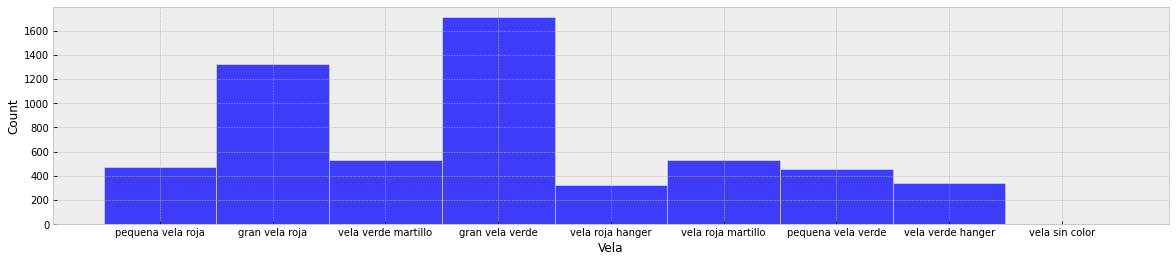

In [3]:
fig, ax = plt.subplots(figsize=(20, 4))
sns.histplot(data=PrecioAcciones,x="Vela")
plt.show()

**Comprobando que las velas de color verde representan ganancias y las velas de color rojo representan perdidas**

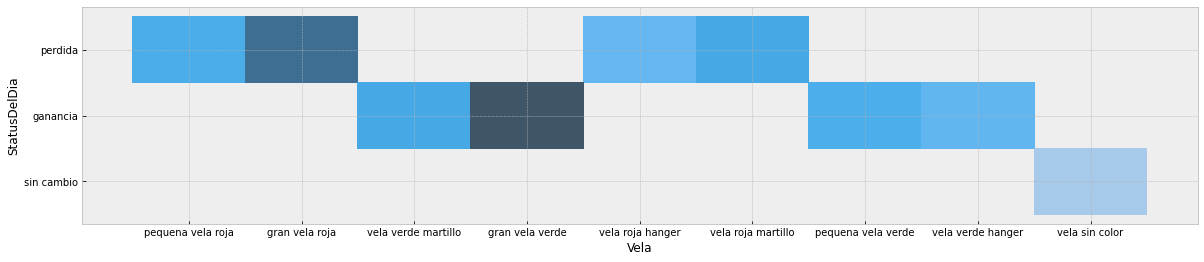

In [4]:
fig, ax = plt.subplots(figsize=(20, 4))
sns.histplot(data=PrecioAcciones,x="Vela", y="StatusDelDia")
plt.show()

**Creando columna al final de la tabla con el resultado del dia siguiente "ganancia" o "perdida"**

In [5]:
df['StatusDiaSiguiente'] = df['StatusDelDia'].shift(-1)
PrecioAcciones.head()

,Fecha,PrecioApertura,PrecioMasAlto,PrecioMasBajo,PrecioCierre,CierreAjustado,Volumen,PM20,PM50,PM100,...,CierreMenosApertura,StatusDelDia,CambioSobreCincoPuntos,CambioSobreDiezPuntos,ColorDeVela,CuerpoDeVela,TendenciaDeVela,Vela,Tendencia,StatusDiaSiguiente
0,3-Jan-00,"$1,469.25","$1,478.00","$1,438.36","$1,455.22","$1,455.22","931,800,000","$1,431.21","$1,396.10","$1,356.80",...,-$14.03,perdida,True,True,rojo,cuerpo pequeno,medio,pequena vela roja,tendencia a la alza,perdida
1,4-Jan-00,"$1,455.22","$1,455.22","$1,397.43","$1,399.42","$1,399.42","1,009,000,000","$1,432.31","$1,399.53","$1,358.33",...,-$55.80,perdida,True,True,rojo,cuerpo grande,medio,gran vela roja,tendencia a la alza,ganancia
2,5-Jan-00,"$1,399.42","$1,413.27","$1,377.68","$1,402.11","$1,402.11","1,085,500,000","$1,431.12","$1,401.49","$1,359.34",...,$2.69,ganancia,False,False,verde,cuerpo pequeno,arriba,vela verde martillo,tendencia a la alza,ganancia
3,6-Jan-00,"$1,402.11","$1,411.90","$1,392.10","$1,403.45","$1,403.45","1,092,300,000","$1,430.76","$1,403.66","$1,360.09",...,$1.34,ganancia,False,False,verde,cuerpo pequeno,arriba,vela verde martillo,tendencia a la alza,ganancia
4,7-Jan-00,"$1,403.45","$1,441.47","$1,400.73","$1,441.47","$1,441.47","1,225,200,000","$1,430.74","$1,406.09","$1,360.82",...,$38.02,ganancia,True,True,verde,cuerpo grande,medio,gran vela verde,tendencia a la alza,ganancia


**Seleccionando filas en las que el dia siguiente es ganancia y guardando en nueva variable**

In [6]:
DiaSiguienteGanancia = PrecioAcciones.loc[df['StatusDiaSiguiente'] == 'ganancia']

*Graficando podria analizarse que la "gran vela verde" y "gran vela roja" se encuentran con mas frecuencia - en ese orden-, cuando al dia siguiente va a haber ganancia, sin embargo estas son las velas que mas se presentan en toda la distribucion por lo que incluir la tendencia del mercado y hacer graficos por separados con tendencia a la alza y la baja puede ayudar a aclarar mas.*

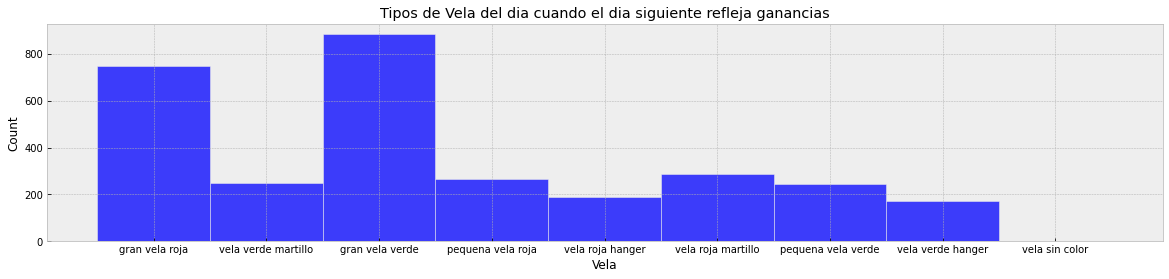

In [7]:
fig, ax = plt.subplots(figsize=(20, 4))
sns.histplot(data=DiaSiguienteGanancia,x="Vela").set(title='Tipos de Vela del dia cuando el dia siguiente refleja ganancias')
plt.show()

**Seleccionando filas en las que el dia siguiente es perdida y guardando en nueva variable**

In [8]:
DiaSiguientePerdida = PrecioAcciones.loc[df['StatusDiaSiguiente'] == 'perdida']

*Graficando podria analizarse que la "gran vela verde" se encuentra con mas frecuencia cuando al dia siguiente va a haber perdida, seguido por la "gran vela roja". Sin embargo estas son las velas que mas se presentan en toda la distribucion por lo que incluir la tendencia del mercado y hacer graficos por separados con tendencia a la alza y la baja puede ayudar a aclarar mas.*

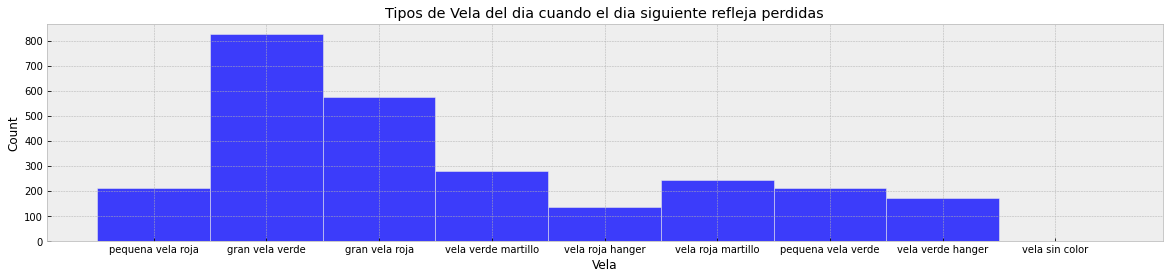

In [9]:
fig, ax = plt.subplots(figsize=(20, 4))
sns.histplot(data=DiaSiguientePerdida,x="Vela").set(title='Tipos de Vela del dia cuando el dia siguiente refleja perdidas')
plt.show()

**Seleccionando filas en las que el dia siguiente es ganancia y tendencia a la alza, guardando en nueva variable**

In [10]:
DiaSiguienteGananciaAlza = PrecioAcciones.loc[(df['StatusDiaSiguiente'] == 'ganancia') & (df['Tendencia'] == 'tendencia a la alza')]
DiaSiguienteGananciaAlza.head()

,Fecha,PrecioApertura,PrecioMasAlto,PrecioMasBajo,PrecioCierre,CierreAjustado,Volumen,PM20,PM50,PM100,...,CierreMenosApertura,StatusDelDia,CambioSobreCincoPuntos,CambioSobreDiezPuntos,ColorDeVela,CuerpoDeVela,TendenciaDeVela,Vela,Tendencia,StatusDiaSiguiente
1,4-Jan-00,"$1,455.22","$1,455.22","$1,397.43","$1,399.42","$1,399.42","1,009,000,000","$1,432.31","$1,399.53","$1,358.33",...,-$55.80,perdida,True,True,rojo,cuerpo grande,medio,gran vela roja,tendencia a la alza,ganancia
2,5-Jan-00,"$1,399.42","$1,413.27","$1,377.68","$1,402.11","$1,402.11","1,085,500,000","$1,431.12","$1,401.49","$1,359.34",...,$2.69,ganancia,False,False,verde,cuerpo pequeno,arriba,vela verde martillo,tendencia a la alza,ganancia
3,6-Jan-00,"$1,402.11","$1,411.90","$1,392.10","$1,403.45","$1,403.45","1,092,300,000","$1,430.76","$1,403.66","$1,360.09",...,$1.34,ganancia,False,False,verde,cuerpo pequeno,arriba,vela verde martillo,tendencia a la alza,ganancia
4,7-Jan-00,"$1,403.45","$1,441.47","$1,400.73","$1,441.47","$1,441.47","1,225,200,000","$1,430.74","$1,406.09","$1,360.82",...,$38.02,ganancia,True,True,verde,cuerpo grande,medio,gran vela verde,tendencia a la alza,ganancia
7,12-Jan-00,"$1,438.56","$1,442.60","$1,427.08","$1,432.25","$1,432.25","974,600,000","$1,435.60","$1,412.80","$1,364.19",...,-$6.31,perdida,True,False,rojo,cuerpo pequeno,medio,pequena vela roja,tendencia a la alza,ganancia


*Graficando podria analizarse que la "gran vela verde" y la "gran vela roja" se encuentran con mas frecuencia cuando al dia siguiente va a haber ganancias, y hay una tendencia a la alza. Sin embargo estas son las velas que mas se presentan en toda la distribucion por lo que debe considerarse mas factores para concluir una posible relacion entre variables*

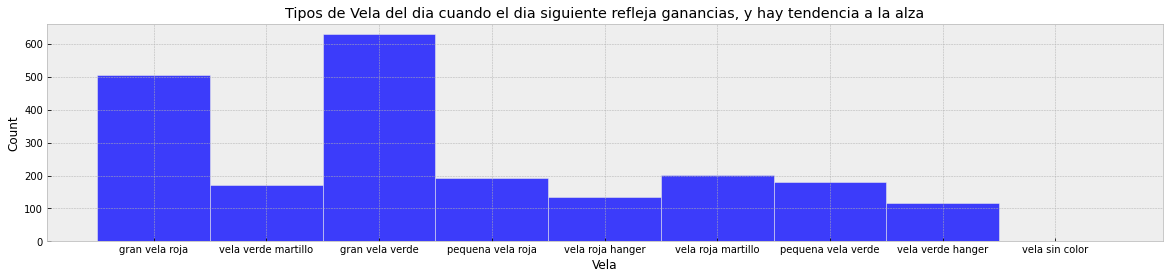

In [11]:
fig, ax = plt.subplots(figsize=(20, 4))
sns.histplot(data=DiaSiguienteGananciaAlza,x="Vela").set(title='Tipos de Vela del dia cuando el dia siguiente refleja ganancias, y hay tendencia a la alza')
plt.show()

**Seleccionando filas en las que el dia siguiente es perdida y tendencia a la alza, guardando en nueva variable**

In [12]:
DiaSiguientePerdidaAlza = PrecioAcciones.loc[(df['StatusDiaSiguiente'] == 'perdida') & (df['Tendencia'] == 'tendencia a la alza')]
DiaSiguientePerdidaAlza.head()

,Fecha,PrecioApertura,PrecioMasAlto,PrecioMasBajo,PrecioCierre,CierreAjustado,Volumen,PM20,PM50,PM100,...,CierreMenosApertura,StatusDelDia,CambioSobreCincoPuntos,CambioSobreDiezPuntos,ColorDeVela,CuerpoDeVela,TendenciaDeVela,Vela,Tendencia,StatusDiaSiguiente
0,3-Jan-00,"$1,469.25","$1,478.00","$1,438.36","$1,455.22","$1,455.22","931,800,000","$1,431.21","$1,396.10","$1,356.80",...,-$14.03,perdida,True,True,rojo,cuerpo pequeno,medio,pequena vela roja,tendencia a la alza,perdida
5,10-Jan-00,"$1,441.47","$1,464.36","$1,441.47","$1,457.60","$1,457.60","1,064,800,000","$1,432.41","$1,408.98","$1,361.79",...,$16.13,ganancia,True,True,verde,cuerpo grande,medio,gran vela verde,tendencia a la alza,perdida
6,11-Jan-00,"$1,457.60","$1,458.66","$1,434.42","$1,438.56","$1,438.56","1,014,000,000","$1,434.44","$1,411.29","$1,363.04",...,-$19.04,perdida,True,True,rojo,cuerpo grande,medio,gran vela roja,tendencia a la alza,perdida
9,14-Jan-00,"$1,449.68","$1,473.00","$1,449.68","$1,465.15","$1,465.15","1,085,900,000","$1,438.88","$1,416.40","$1,366.04",...,$15.47,ganancia,True,True,verde,cuerpo grande,medio,gran vela verde,tendencia a la alza,perdida
11,19-Jan-00,"$1,455.14","$1,461.39","$1,448.68","$1,455.90","$1,455.90","1,087,800,000","$1,442.90","$1,420.45","$1,367.79",...,$0.76,ganancia,False,False,verde,cuerpo pequeno,arriba,vela verde martillo,tendencia a la alza,perdida


*Graficando podria analizarse que la "gran vela verde" y la "gran vela roja" se encuentran con mas frecuencia cuando al dia siguiente va a haber ganancias, y hay una tendencia a la alza. Sin embargo estas son las velas que mas se presentan en toda la distribucion por lo que debe considerarse mas factores para concluir una posible relacion entre variables

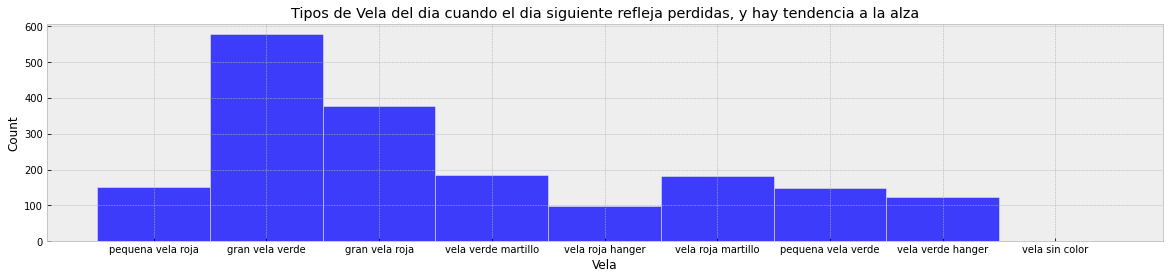

In [13]:
fig, ax = plt.subplots(figsize=(20, 4))
sns.histplot(data=DiaSiguientePerdidaAlza,x="Vela").set(title='Tipos de Vela del dia cuando el dia siguiente refleja perdidas, y hay tendencia a la alza')
plt.show()

**Seleccionando filas en las que el dia siguiente es ganancia y tendencia a la baja, guardando en nueva variable**

In [14]:
DiaSiguienteGananciaBaja = PrecioAcciones.loc[(df['StatusDiaSiguiente'] == 'ganancia') & (df['Tendencia'] == 'tendencia a la baja')]
DiaSiguienteGananciaBaja.head()

,Fecha,PrecioApertura,PrecioMasAlto,PrecioMasBajo,PrecioCierre,CierreAjustado,Volumen,PM20,PM50,PM100,...,CierreMenosApertura,StatusDelDia,CambioSobreCincoPuntos,CambioSobreDiezPuntos,ColorDeVela,CuerpoDeVela,TendenciaDeVela,Vela,Tendencia,StatusDiaSiguiente
231,30-Nov-00,"$1,341.91","$1,341.91","$1,294.90","$1,314.95","$1,314.95","1,186,530,000","$1,378.04","$1,393.61","$1,438.04",...,-$26.96,perdida,True,True,rojo,cuerpo grande,medio,gran vela roja,tendencia a la baja,ganancia
232,1-Dec-00,"$1,314.95","$1,334.67","$1,307.02","$1,315.23","$1,315.23","1,195,200,000","$1,372.73","$1,390.89","$1,436.38",...,$0.28,ganancia,False,False,verde,cuerpo pequeno,abajo,vela verde hanger,tendencia a la baja,ganancia
233,4-Dec-00,"$1,315.18","$1,332.06","$1,310.23","$1,324.97","$1,324.97","1,103,000,000","$1,367.07","$1,388.21","$1,434.60",...,$9.79,ganancia,True,False,verde,cuerpo pequeno,medio,pequena vela verde,tendencia a la baja,ganancia
236,7-Dec-00,"$1,351.46","$1,353.50","$1,339.26","$1,343.55","$1,343.55","1,128,000,000","$1,355.19","$1,382.97","$1,429.97",...,-$7.91,perdida,True,False,rojo,cuerpo grande,medio,gran vela roja,tendencia a la baja,ganancia
237,8-Dec-00,"$1,343.55","$1,380.33","$1,343.55","$1,369.89","$1,369.89","1,358,300,000","$1,351.90","$1,381.31","$1,428.47",...,$26.34,ganancia,True,True,verde,cuerpo grande,medio,gran vela verde,tendencia a la baja,ganancia


*Graficando podria analizarse que la "gran vela verde" y la "gran vela roja" se encuentran con mas frecuencia cuando al dia siguiente va a haber ganancias, y hay una tendencia a la alza. En este caso ambas distribucioens son mas parejas. Ya que estas son las velas que mas se presentan en toda la distribucion debe considerarse mas factores para concluir una posible relacion entre variables

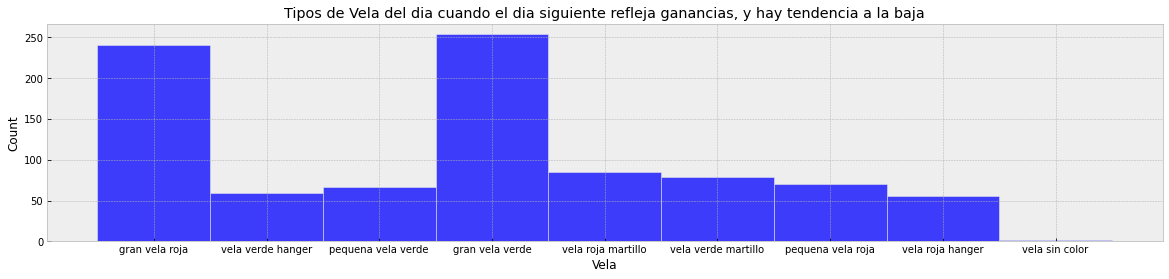

In [15]:
fig, ax = plt.subplots(figsize=(20, 4))
sns.histplot(data=DiaSiguienteGananciaBaja,x="Vela").set(title='Tipos de Vela del dia cuando el dia siguiente refleja ganancias, y hay tendencia a la baja')
plt.show()

**Seleccionando filas en las que el dia siguiente es perdida y tendencia a la baja, guardando en nueva variable**

In [16]:
DiaSiguientePerdidaBaja = PrecioAcciones.loc[(df['StatusDiaSiguiente'] == 'perdida') & (df['Tendencia'] == 'tendencia a la baja')]
DiaSiguientePerdidaBaja.head()

,Fecha,PrecioApertura,PrecioMasAlto,PrecioMasBajo,PrecioCierre,CierreAjustado,Volumen,PM20,PM50,PM100,...,CierreMenosApertura,StatusDelDia,CambioSobreCincoPuntos,CambioSobreDiezPuntos,ColorDeVela,CuerpoDeVela,TendenciaDeVela,Vela,Tendencia,StatusDiaSiguiente
234,5-Dec-00,"$1,324.97","$1,376.56","$1,324.97","$1,376.54","$1,376.54","900,300,000","$1,361.99","$1,385.74","$1,432.89",...,$51.57,ganancia,True,True,verde,cuerpo grande,medio,gran vela verde,tendencia a la baja,perdida
235,6-Dec-00,"$1,376.54","$1,376.54","$1,346.15","$1,351.46","$1,351.46","1,399,300,000","$1,359.21","$1,384.49","$1,431.56",...,-$25.08,perdida,True,True,rojo,cuerpo grande,medio,gran vela roja,tendencia a la baja,perdida
238,11-Dec-00,"$1,369.89","$1,389.05","$1,364.14","$1,380.20","$1,380.20","1,202,400,000","$1,350.39","$1,379.54","$1,427.35",...,$10.31,ganancia,True,True,verde,cuerpo pequeno,medio,pequena vela verde,tendencia a la baja,perdida
239,12-Dec-00,"$1,380.20","$1,380.27","$1,370.27","$1,371.18","$1,371.18","1,083,400,000","$1,351.10","$1,378.42","$1,426.19",...,-$9.02,perdida,True,False,rojo,cuerpo grande,medio,gran vela roja,tendencia a la baja,perdida
240,13-Dec-00,"$1,371.18","$1,385.82","$1,358.48","$1,359.99","$1,359.99","1,195,100,000","$1,352.09","$1,377.12","$1,425.10",...,-$11.19,perdida,True,True,rojo,cuerpo pequeno,abajo,vela roja hanger,tendencia a la baja,perdida


*Graficando podria analizarse que la "gran vela verde" y la "gran vela roja" se encuentran con mas frecuencia cuando al dia siguiente va a haber ganancias, y hay una tendencia a la alza. Sin embargo estas son las velas que mas se presentan en toda la distribucion por lo que debe considerarse mas factores para concluir una posible relacion entre variables

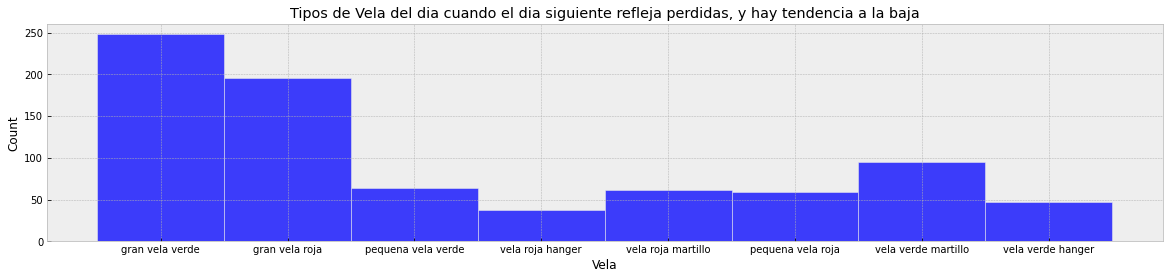

In [17]:
fig, ax = plt.subplots(figsize=(20, 4))
sns.histplot(data=DiaSiguientePerdidaBaja,x="Vela").set(title='Tipos de Vela del dia cuando el dia siguiente refleja perdidas, y hay tendencia a la baja')
plt.show()

#**Conclusiones preliminares de las graficas**

1. La "gran vela verde" y la "gran vela roja" se encuentran con mayor frecuencia a lo largo de toda la distribucion, especialmente la primera. Con menor frecuencia se encuentran la "vela roja hanger" y la "vela verde hanger". Dado esto, el analisis exploratorio grafico no arroja grandes pistas de la relacion entre variables ya que en todos los casos estas dos velas son las que se ven con mas frecuencia.

2. En tendencia a la alza, la gran vela verde parece estar mas relacionada con ganancias al dia siguiente que la gran vela roja. Aunque esta vela tambien se muestra con alta frecuencia cuando hay perdidas al dia siguiente en tendencia a la alza, por lo que puede no ser un indicador fuerte en esta tendencia alcista.

3. En tendencia a la baja, las distribuciones de gran vela roja y gran vela verde son muy similares en cuanto a frecuencia, sin embargo la gran vela verde en tendencia a la baja parece ser un mejor indicador de perdidas al dia siguiente

#**Recomendaciones**

Para este caso se recomendaria seguir un modelo de Aprendizaje Supervisado de Regresion binaria ya que la variable dependiente a predecir es categorica/ binaria (ganancia vs perdida) y tambien lo son las variables dependientes (Tipo de Vela y Tendencia del Mercado

El Analisis Exploratorio grafico debe especificarse en mayor medida ya que la frecuencia alta de la "gran vela verde" y la "gran vela roja" en todos los escenarios dificultan ver visualmente cuando pueden llegar a ser indicadores asi como el efecto de los otros tipos de vela. Es importante considerar el efecto de variables como la tendencia, promedios moviles, volumen, etc para sacar conclusiones mas acertadas



#**Feature Engineering**#

**Transformando la columna de StatusDelDiaSiguiente a Binario donde Ganancia = 1 y Perdida = 0**

In [18]:
df['GananciaBinario'] = np.where(df['StatusDiaSiguiente']=='ganancia',1, 0)
df.head()

,Fecha,PrecioApertura,PrecioMasAlto,PrecioMasBajo,PrecioCierre,CierreAjustado,Volumen,PM20,PM50,PM100,...,StatusDelDia,CambioSobreCincoPuntos,CambioSobreDiezPuntos,ColorDeVela,CuerpoDeVela,TendenciaDeVela,Vela,Tendencia,StatusDiaSiguiente,GananciaBinario
0,3-Jan-00,"$1,469.25","$1,478.00","$1,438.36","$1,455.22","$1,455.22","931,800,000","$1,431.21","$1,396.10","$1,356.80",...,perdida,True,True,rojo,cuerpo pequeno,medio,pequena vela roja,tendencia a la alza,perdida,0
1,4-Jan-00,"$1,455.22","$1,455.22","$1,397.43","$1,399.42","$1,399.42","1,009,000,000","$1,432.31","$1,399.53","$1,358.33",...,perdida,True,True,rojo,cuerpo grande,medio,gran vela roja,tendencia a la alza,ganancia,1
2,5-Jan-00,"$1,399.42","$1,413.27","$1,377.68","$1,402.11","$1,402.11","1,085,500,000","$1,431.12","$1,401.49","$1,359.34",...,ganancia,False,False,verde,cuerpo pequeno,arriba,vela verde martillo,tendencia a la alza,ganancia,1
3,6-Jan-00,"$1,402.11","$1,411.90","$1,392.10","$1,403.45","$1,403.45","1,092,300,000","$1,430.76","$1,403.66","$1,360.09",...,ganancia,False,False,verde,cuerpo pequeno,arriba,vela verde martillo,tendencia a la alza,ganancia,1
4,7-Jan-00,"$1,403.45","$1,441.47","$1,400.73","$1,441.47","$1,441.47","1,225,200,000","$1,430.74","$1,406.09","$1,360.82",...,ganancia,True,True,verde,cuerpo grande,medio,gran vela verde,tendencia a la alza,ganancia,1


**Seleccionando solo las columnas que contienen los datos relevantes para el modulo**

In [19]:
DataFiltrada = df[['Vela','Tendencia','GananciaBinario']]
DataFiltrada

,Vela,Tendencia,GananciaBinario
0,pequena vela roja,tendencia a la alza,0
1,gran vela roja,tendencia a la alza,1
2,vela verde martillo,tendencia a la alza,1
3,vela verde martillo,tendencia a la alza,1
4,gran vela verde,tendencia a la alza,1
...,...,...,...
5698,gran vela verde,tendencia a la baja,0
5699,gran vela roja,tendencia a la baja,0
5700,vela roja hanger,tendencia a la baja,0
5701,gran vela roja,tendencia a la baja,0


# **MODELO PROPUESTO**

#**Regresion logistica - binaria**#

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split



In [21]:
DataFiltrada2 = DataFiltrada.copy()
DataFiltrada2 = pd.get_dummies(DataFiltrada2, columns = ['Vela','Tendencia'])
DataFiltrada2

,GananciaBinario,Vela_gran vela roja,Vela_gran vela verde,Vela_pequena vela roja,Vela_pequena vela verde,Vela_vela roja hanger,Vela_vela roja martillo,Vela_vela sin color,Vela_vela verde hanger,Vela_vela verde martillo,Tendencia_tendencia a la alza,Tendencia_tendencia a la baja
0,0,0,0,1,0,0,0,0,0,0,1,0
1,1,1,0,0,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0,0,0,1,1,0
3,1,0,0,0,0,0,0,0,0,1,1,0
4,1,0,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5698,0,0,1,0,0,0,0,0,0,0,0,1
5699,0,1,0,0,0,0,0,0,0,0,0,1
5700,0,0,0,0,0,1,0,0,0,0,0,1
5701,0,1,0,0,0,0,0,0,0,0,0,1


In [22]:
categorical = [var for var in DataFiltrada2.columns if DataFiltrada2[var].dtype=='O']
DataFiltrada2[categorical].nunique()

Series([], dtype: float64)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(
    DataFiltrada2.drop(['Vela_gran vela roja','Vela_gran vela verde','Vela_pequena vela roja','Vela_pequena vela verde','Vela_vela roja hanger','Vela_vela roja martillo',
                        'Vela_vela sin color','Vela_vela verde hanger','Vela_vela verde martillo','Tendencia_tendencia a la alza','Tendencia_tendencia a la baja'], axis=1),  # predictors
    DataFiltrada2['GananciaBinario'],  # target
    test_size=0.3,  # percentage of obs in test set
    random_state=0)  # seed to ensure reproducibility

X_train.shape, X_test.shape

((3992, 1), (1711, 1))

In [24]:
model = LogisticRegression(max_iter=10000, n_jobs=-1)
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000, n_jobs=-1)

In [25]:
predicciones = model.predict(X_test)
predicciones

array([1, 1, 1, ..., 1, 0, 0])

In [26]:
print(accuracy_score(y_test, predicciones))

1.0


#**Importando datos desde API**#

In [27]:
import requests
import json
!pip install yfinance
!pip install yahoo_fin

url='https://query1.finance.yahoo.com/v7/finance/options/fb'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 KB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 37.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 KB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 KB 15.4 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
   

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 KB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 KB 6.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.4/83.4 KB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.0/107.0 KB 12.2 MB/s eta 0:00:00
  Created wheel for parse: filename=parse-1.19.0-py3-none-any.whl size=24591 sha256=16705f1afba986f817fd3f227c677d0444b58dbf08189b46b318ee9a3453b7ae
  Stored in directory: /root/.cache/pip/wheels/e5/33/1f/68392720485b3ecf125a69e700baaab7624616deedea2fa6e2
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-py3-none-any.whl size=6066 sha256=1023534e0defa348a3c29b19fdb1363a826daf8d491150388b309fbc473d0cbb
  Stor

In [29]:
#aqui probando otro metodo y datos anuales
import yfinance as yf
msft = yf.Ticker("MSFT")
print(msft.options)

import yahoo_fin.stock_info as si
sp_list = si.tickers_sp500()
sp_historical = {}
for ticker in sp_list:
  #solo hice este anio porque era muy pesado todas las fechas de mi base desde el 2000 hasta la actualidad
  sp_historical[ticker] = si.get_data(ticker, start_date="01/01/2022",end_date="08/31/2022", interval="1d")
sp_historical

('2023-01-13', '2023-01-20', '2023-01-27', '2023-02-03', '2023-02-10', '2023-02-17', '2023-02-24', '2023-03-17', '2023-04-21', '2023-06-16', '2023-07-21', '2023-08-18', '2023-09-15', '2024-01-19', '2024-06-21', '2025-01-17', '2025-06-20')


AssertionError: ignored

#**Data Wrangling**#

**Contando valores: Ganancias vs Perdidas**

In [ ]:
PrecioAcciones['StatusDiaSiguiente'].value_counts()

ganancia      3044
perdida       2655
sin cambio       3
Name: StatusDiaSiguiente, dtype: int64

**Contando valores: Tipos de vela**

In [ ]:
PrecioAcciones['Vela'].value_counts()

gran vela verde        1711
gran vela roja         1324
vela verde martillo     529
vela roja martillo      529
pequena vela roja       475
pequena vela verde      459
vela verde hanger       345
vela roja hanger        328
vela sin color            3
Name: Vela, dtype: int64

**Group By** 

In [ ]:
# Aqui se queria agregar una columna con los a#os y otra con los meses, para poder hacer exploracion y comparar a#o a a#o, mes a mes, etc pero no encontre la forma de hacerlo 